https://radimrehurek.com/gensim/models/word2vec.html

https://rare-technologies.com/word2vec-tutorial/

In [7]:
import collections
import gensim
from gensim.models import word2vec
import logging
import numpy as np

# Cargo dataset

In [8]:
sentences = np.load('news_sentences.npy')

In [9]:
print(sentences[0])
print(sentences[1])

['macron', 'takes', 'europe', 'center', 'stage', 'while', 'merkel', 'falters']
['french', 'president', 'emmanuel', 'macron', 'looks', 'like', 'the', 'last', 'best', 'hope', 'to', 'salvage', 'a', 'unified', 'europe', 'as', 'britain', 'drifts', 'away', 'and', 'germany', 'bogs', 'down']


In [10]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

- size=100 # Dimención de features a la salida (Palabras)
- alpha=0.025 # is the initial learning rate (will linearly drop to min_alpha as training progresses).
- min_alpha=0.0001
- window=5 # Tamaño de contexto. En este caso 5 para cada lado
- min_count=5 # si no aparece mas de min_count, la palabra no forma parte del diccionario
- max_vocab_size=None
- sample=0.001 (submuestrea las palabras con mucha ocurrencia. Tipicamente no aportan informacion. Stopwords)
- sg=0 # sg = 1 -> skipgram. sg=0 -> CBOW
- hs=0, # if 1, hierarchical softmax will be used for model training. If set to 0 (default), and negative is non-zero, negative sampling will be used.
- negative=5 # Cantidad de ejemplos negaticos en skipgram model. Entre 5 o 20 para datasets chico, 2-5 para grandes
- iter=5 # Cantidad de epochs
- batch_words=10000
- compute_loss=False

In [11]:
model = gensim.models.Word2Vec(sentences, iter=100, min_count=10, size=300, workers=4, sg=0)

2017-12-06 15:14:48,781 : INFO : collecting all words and their counts
2017-12-06 15:14:48,783 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-12-06 15:14:48,861 : INFO : PROGRESS: at sentence #10000, processed 162267 words, keeping 20866 word types
2017-12-06 15:14:48,914 : INFO : PROGRESS: at sentence #20000, processed 323702 words, keeping 30856 word types
2017-12-06 15:14:49,036 : INFO : PROGRESS: at sentence #30000, processed 488907 words, keeping 39448 word types
2017-12-06 15:14:49,107 : INFO : PROGRESS: at sentence #40000, processed 649326 words, keeping 46973 word types
2017-12-06 15:14:49,166 : INFO : PROGRESS: at sentence #50000, processed 810570 words, keeping 53326 word types
2017-12-06 15:14:49,227 : INFO : PROGRESS: at sentence #60000, processed 971904 words, keeping 59184 word types
2017-12-06 15:14:49,290 : INFO : PROGRESS: at sentence #70000, processed 1134642 words, keeping 64707 word types
2017-12-06 15:14:49,312 : INFO : collected 66

2017-12-06 15:15:52,564 : INFO : PROGRESS: at 45.26% examples, 633784 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:15:53,579 : INFO : PROGRESS: at 45.97% examples, 633514 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:15:54,593 : INFO : PROGRESS: at 46.57% examples, 631682 words/s, in_qsize 6, out_qsize 1
2017-12-06 15:15:55,618 : INFO : PROGRESS: at 47.24% examples, 630805 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:15:56,627 : INFO : PROGRESS: at 47.74% examples, 627901 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:15:57,656 : INFO : PROGRESS: at 48.43% examples, 627295 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:15:58,661 : INFO : PROGRESS: at 49.21% examples, 627992 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:15:59,684 : INFO : PROGRESS: at 50.00% examples, 628707 words/s, in_qsize 5, out_qsize 2
2017-12-06 15:16:00,688 : INFO : PROGRESS: at 50.76% examples, 629279 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:16:01,690 : INFO : PROGRESS: at 51.57% examples, 630356 wor

2017-12-06 15:17:09,773 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-12-06 15:17:09,774 : INFO : training on 118780500 raw words (87698265 effective words) took 139.8s, 627182 effective words/s


In [12]:
print('Tamaño del vocabulario:', len(model.wv.vocab))

Tamaño del vocabulario: 10161


In [13]:
model.wv.most_similar('macron')

2017-12-06 15:18:09,318 : INFO : precomputing L2-norms of word weight vectors


[('emmanuel', 0.6868938207626343),
 ('lebanon', 0.3942967653274536),
 ('mnangagwa', 0.3762456774711609),
 ('hariri', 0.3407079577445984),
 ('french', 0.34018993377685547),
 ('merkel', 0.3155909776687622),
 ('lebanese', 0.3047278821468353),
 ('germany', 0.2992989122867584),
 ('maduro', 0.29840829968452454),
 ('mario', 0.2974306643009186)]

In [14]:
model.wv.most_similar('president')

[('leader', 0.3772726058959961),
 ('presidential', 0.3736579418182373),
 ('emmerson', 0.35369059443473816),
 ('mnangagwa', 0.33870089054107666),
 ('vice-president', 0.33647421002388),
 ('chairman', 0.3208899199962616),
 ('senator', 0.32032498717308044),
 ('ambassador', 0.31990426778793335),
 ('presidency', 0.31647589802742004),
 ('vp', 0.3153263330459595)]

In [15]:
model.wv.most_similar('tennis')

[('novotna', 0.34398093819618225),
 ('gracie', 0.3322111964225769),
 ('two-time', 0.3122576177120209),
 ('atp', 0.30608391761779785),
 ('czech', 0.3004707098007202),
 ('jana', 0.2955424189567566),
 ('championships', 0.2901061177253723),
 ('49', 0.28999102115631104),
 ('pop', 0.28310704231262207),
 ('wars', 0.28294241428375244)]

In [16]:
model.wv.most_similar('trump')

[('trump:', 0.5691390633583069),
 ('tusk', 0.5017842054367065),
 ('vladimir', 0.36471372842788696),
 ('obama', 0.357918918132782),
 ('kenyatta', 0.31591296195983887),
 ("trump'", 0.30706125497817993),
 ('his', 0.3056204319000244),
 ('uhuru', 0.2984912395477295),
 ('hillary', 0.2935839593410492),
 ('recep', 0.29290086030960083)]

In [17]:
model.wv.most_similar('he')

[('she', 0.7178155183792114),
 ('it', 0.5356009602546692),
 ('they', 0.4476374387741089),
 ('his', 0.4322208762168884),
 ('him', 0.39186710119247437),
 ('i', 0.3894273638725281),
 ('her', 0.3799704909324646),
 ('nobody', 0.35068780183792114),
 ('“i', 0.33515703678131104),
 ('wenger', 0.32613295316696167)]

# Bigram model

In [18]:
bigram_transformer = gensim.models.Phrases(sentences)

2017-12-06 15:18:16,137 : INFO : collecting all words and their counts
2017-12-06 15:18:16,139 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2017-12-06 15:18:16,524 : INFO : PROGRESS: at sentence #10000, processed 162267 words and 114510 word types
2017-12-06 15:18:16,904 : INFO : PROGRESS: at sentence #20000, processed 323702 words and 196859 word types
2017-12-06 15:18:17,284 : INFO : PROGRESS: at sentence #30000, processed 488907 words and 273411 word types
2017-12-06 15:18:17,666 : INFO : PROGRESS: at sentence #40000, processed 649326 words and 345083 word types
2017-12-06 15:18:18,141 : INFO : PROGRESS: at sentence #50000, processed 810570 words and 411549 word types
2017-12-06 15:18:18,658 : INFO : PROGRESS: at sentence #60000, processed 971904 words and 475309 word types
2017-12-06 15:18:19,089 : INFO : PROGRESS: at sentence #70000, processed 1134642 words and 536781 word types
2017-12-06 15:18:19,217 : INFO : collected 556123 word types from a corpus of 

In [19]:
bigram = gensim.models.phrases.Phraser(bigram_transformer)

2017-12-06 15:18:21,973 : INFO : source_vocab length 556123
2017-12-06 15:18:29,311 : INFO : Phraser built with 7246 7246 phrasegrams


In [20]:
bigram_sentences = []
for sentence in sentences:
    bigram_sentences.append(bigram[sentence])
print(bigram_sentences[:2])

[['macron', 'takes', 'europe', 'center_stage', 'while', 'merkel', 'falters'], ['french_president', 'emmanuel_macron', 'looks_like', 'the', 'last', 'best', 'hope', 'to', 'salvage', 'a', 'unified', 'europe', 'as', 'britain', 'drifts', 'away', 'and', 'germany', 'bogs', 'down']]


In [21]:
word_vect_size=300
model = gensim.models.Word2Vec(bigram_sentences, iter=100, min_count=10, size=word_vect_size, workers=4, batch_words=1000)

2017-12-06 15:18:35,199 : INFO : collecting all words and their counts
2017-12-06 15:18:35,200 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-12-06 15:18:35,268 : INFO : PROGRESS: at sentence #10000, processed 145058 words, keeping 24233 word types
2017-12-06 15:18:35,344 : INFO : PROGRESS: at sentence #20000, processed 288134 words, keeping 35449 word types
2017-12-06 15:18:35,425 : INFO : PROGRESS: at sentence #30000, processed 434917 words, keeping 44809 word types
2017-12-06 15:18:35,485 : INFO : PROGRESS: at sentence #40000, processed 578447 words, keeping 52812 word types
2017-12-06 15:18:35,547 : INFO : PROGRESS: at sentence #50000, processed 722356 words, keeping 59471 word types
2017-12-06 15:18:35,607 : INFO : PROGRESS: at sentence #60000, processed 866920 words, keeping 65530 word types
2017-12-06 15:18:35,662 : INFO : PROGRESS: at sentence #70000, processed 1012893 words, keeping 71185 word types
2017-12-06 15:18:35,684 : INFO : collected 72

2017-12-06 15:19:38,282 : INFO : PROGRESS: at 40.94% examples, 490872 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:19:39,285 : INFO : PROGRESS: at 41.62% examples, 491070 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:19:40,286 : INFO : PROGRESS: at 42.25% examples, 490817 words/s, in_qsize 6, out_qsize 1
2017-12-06 15:19:41,289 : INFO : PROGRESS: at 42.97% examples, 491463 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:19:42,291 : INFO : PROGRESS: at 43.67% examples, 491865 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:19:43,292 : INFO : PROGRESS: at 44.42% examples, 492874 words/s, in_qsize 8, out_qsize 0
2017-12-06 15:19:44,292 : INFO : PROGRESS: at 45.11% examples, 493170 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:19:45,293 : INFO : PROGRESS: at 45.81% examples, 493580 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:19:46,295 : INFO : PROGRESS: at 46.43% examples, 493070 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:19:47,295 : INFO : PROGRESS: at 47.08% examples, 493001 wor

2017-12-06 15:20:58,382 : INFO : PROGRESS: at 98.83% examples, 517463 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:20:59,382 : INFO : PROGRESS: at 99.57% examples, 517683 words/s, in_qsize 7, out_qsize 0
2017-12-06 15:20:59,972 : INFO : worker thread finished; awaiting finish of 3 more threads
2017-12-06 15:20:59,974 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-12-06 15:20:59,975 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-12-06 15:20:59,976 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-12-06 15:20:59,977 : INFO : training on 106065700 raw words (74445197 effective words) took 143.8s, 517764 effective words/s


In [22]:
len(model.wv.vocab)

12416

In [23]:
testing_words = ['emmanuel_macron','donald_trump', 'it', 'europe', 'man', 'police', 'today', 'tv', 'apple']
def test():
    all_tested_words = []
    for word in testing_words:
        print('Cercanos a',word+":")
        all_tested_words.append(word)
        for name in model.wv.most_similar(word):
            all_tested_words.append(name[0])
            print(name)
        print()
    return list(set(all_tested_words))
all_tested_words = test()

2017-12-06 15:31:35,672 : INFO : precomputing L2-norms of word weight vectors


Cercanos a emmanuel_macron:
('french_president', 0.6417835354804993)
('saad_hariri', 0.49371591210365295)
('macron', 0.43687903881073)
('mnangagwa', 0.4176696538925171)
('lebanon_hariri', 0.4175417721271515)
('mugabe:', 0.39427122473716736)
('lebanese_prime', 0.39207884669303894)
('lebanese_pm', 0.38939568400382996)
('minister_saad', 0.3844446837902069)
('amid_political', 0.38042590022087097)

Cercanos a donald_trump:
('trump', 0.5559118986129761)
('president_trump', 0.411718487739563)
('barack_obama', 0.32412469387054443)
('president', 0.31652748584747314)
('trump_campaign', 0.314860463142395)
('hillary_clinton', 0.3147711157798767)
('de_blasio', 0.31148919463157654)
('sean_hannity', 0.3031192123889923)
('jeff_sessions', 0.3010872006416321)
('court_justice', 0.3008520007133484)

Cercanos a it:
('that', 0.5038906335830688)
('the', 0.47818174958229065)
('this', 0.46884971857070923)
('a', 0.4483795762062073)
('he', 0.4245091378688812)
('she', 0.4178164005279541)
('to', 0.4058983922004699

In [24]:
len(all_tested_words)

98

In [25]:
added_words_num = 2*len(all_tested_words)
vectors = np.zeros((len(all_tested_words)+added_words_num, word_vect_size))
i = 0
for word, word_obj in model.wv.vocab.items():
    if word not in all_tested_words:
        vectors[i+len(all_tested_words)] = model.wv[word]
        i+=1
    if i==added_words_num:
        break
print(vectors)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [-1.16067302  0.75625944 -0.24712443 ...,  1.27833831 -1.95639861
   0.19653314]
 [-0.53369057  1.28422236 -1.05508578 ..., -0.38833773  1.29615295
   0.15967993]
 [-0.20677485  0.54481649 -0.84245527 ...,  0.68405193  0.43396762
   0.76199645]]


In [26]:
#vectors = np.zeros((len(all_tested_words)+added_words_num, word_vect_size))
for i, word in enumerate(all_tested_words):
    vectors[i] = model.wv[word]

#for in 
print(vectors)

[[-0.16140734  1.05261958 -0.61458272 ..., -0.43650317 -0.38623244
  -0.691643  ]
 [-1.67859995 -0.87199551  2.3471663  ..., -0.58161581  1.75021243
  -0.53962135]
 [ 0.45565513 -0.81910288 -2.00001645 ...,  0.01877197  1.46329963
   0.28613114]
 ..., 
 [-1.16067302  0.75625944 -0.24712443 ...,  1.27833831 -1.95639861
   0.19653314]
 [-0.53369057  1.28422236 -1.05508578 ..., -0.38833773  1.29615295
   0.15967993]
 [-0.20677485  0.54481649 -0.84245527 ...,  0.68405193  0.43396762
   0.76199645]]


In [28]:
# pylint: disable=missing-docstring
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(9.8, 7))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# PCA

In [32]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=2)
low_dim_embs_PCA = PCA.fit_transform(vectors)

<IPython.core.display.Javascript object>


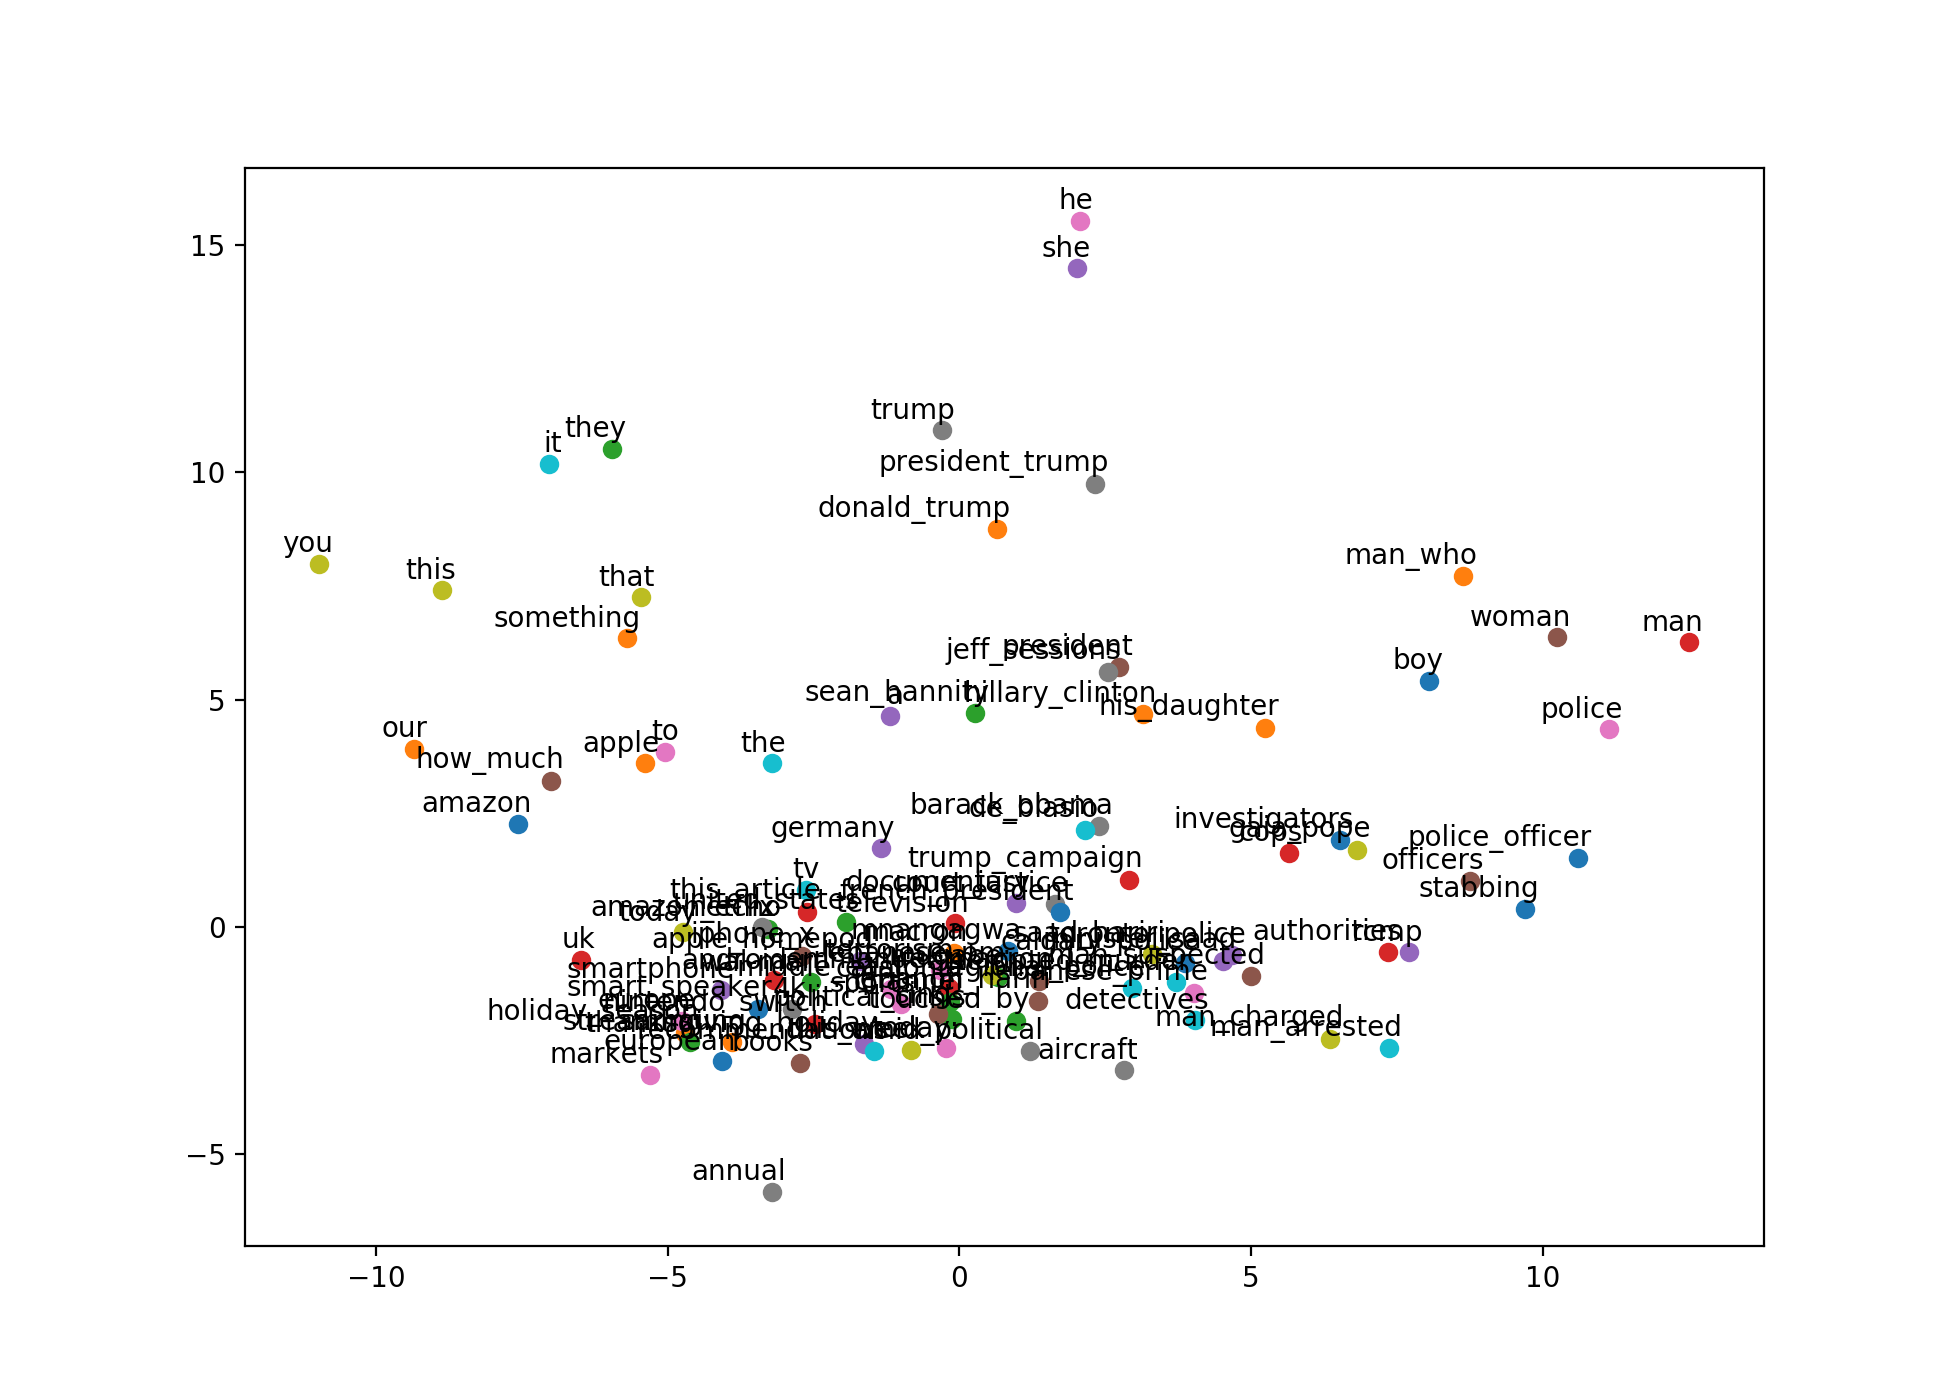

In [33]:
plot_with_labels(low_dim_embs_PCA[:len(all_tested_words)], all_tested_words)

# T-SNE

In [27]:
# Calculo T-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
low_dim_embs = tsne.fit_transform(vectors)

<IPython.core.display.Javascript object>


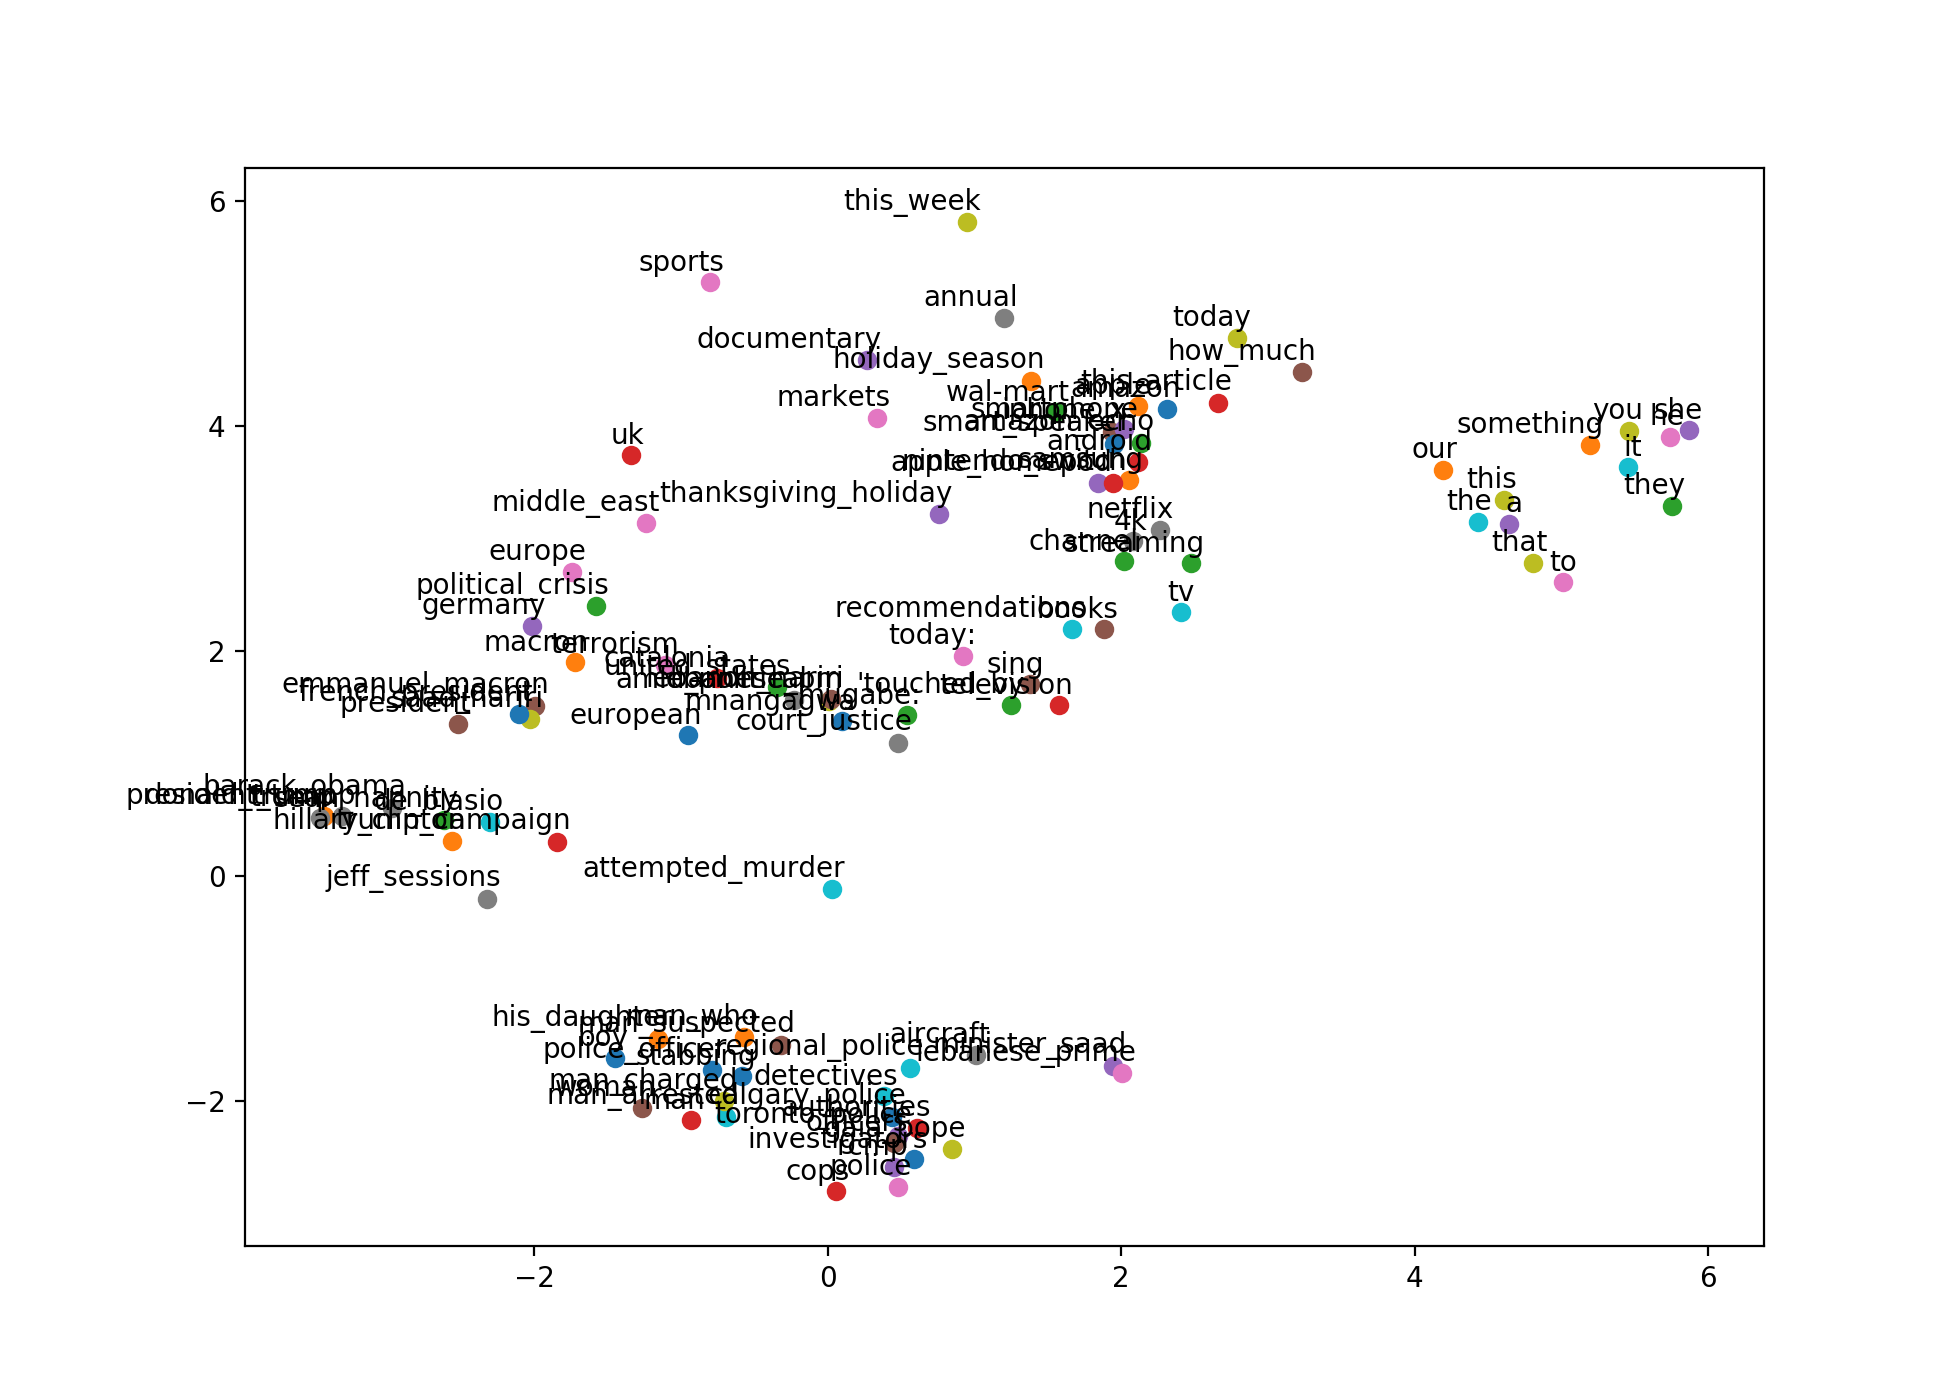

In [29]:
import os
%matplotlib notebook
plot_with_labels(low_dim_embs[:len(all_tested_words)], all_tested_words)

# Se podría correr algun algoritmo de clustering

- k-Means
- SOM (Self Organizing Maps)

# Puede devolver un keras_embedding layer!!!

In [34]:
model.wv.get_keras_embedding()

Using TensorFlow backend.
